In [8]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Baca dataset
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Dataset_1.csv")

# Tampilkan baris dari dataset
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x248,x249,x250,x251,x252,x253,x254,x255,x256,label
0,-1.032690,2.096221,0.384194,-1.214555,2.432575,1.069743,-1.076878,2.140959,0.403971,-1.039528,...,2.423807,0.833363,-0.932956,2.047133,0.089361,-1.062281,2.080691,0.412019,-1.244573,3
1,-0.509585,-0.896533,-0.465612,0.033544,-0.781463,-0.934908,0.061976,-0.712155,-0.929289,-0.624238,...,-0.783508,-0.877666,0.084089,-0.718668,-0.965767,-0.567989,-0.911335,-0.415529,0.167377,3
2,-1.032690,-0.896533,1.243594,-1.101241,-0.781463,-0.934908,-0.355857,-0.020836,-0.726172,-1.039528,...,-0.783508,-0.851601,-0.481456,0.041508,-0.623651,-1.062281,-0.911335,1.288949,-1.201469,0
3,-1.024914,1.367049,0.014966,-1.141605,1.102526,0.197138,-0.921322,1.064377,0.235659,-0.973558,...,1.228601,0.089344,-0.932956,1.093751,0.017282,-0.920086,1.336901,0.012367,-0.990998,3
4,1.585219,-0.896533,-0.782318,0.692780,-0.781463,0.732274,-0.113010,-1.048795,1.248580,1.636419,...,-0.783508,0.902548,0.000080,-1.049062,1.518648,1.607938,-0.911335,-0.824106,0.663292,0


Exploratory Data Analysis (EDA)

                x1           x2           x3           x4           x5  \
count  3264.000000  3264.000000  3264.000000  3264.000000  3264.000000   
mean     -0.108383     0.109415     0.012731    -0.038641     0.025888   
std       0.918837     1.056640     0.940577     1.073387     1.036104   
min      -1.032690    -0.896533    -1.285932    -1.214555    -0.781463   
25%      -1.032690    -0.896533    -0.700087    -1.015734    -0.781463   
50%      -0.332834    -0.207360    -0.011766    -0.083122    -0.574530   
75%       0.618180     0.932127     0.593603     0.545812     0.749548   
max       2.725864     3.223942     3.532661     5.231793     3.814274   

                x6           x7           x8           x9          x10  ...  \
count  3264.000000  3264.000000  3264.000000  3264.000000  3264.000000  ...   
mean     -0.055990    -0.071048     0.110057    -0.039071    -0.110402  ...   
std       0.916824     0.998030     1.013487     0.812572     0.939323  ...   
min      -0.93490

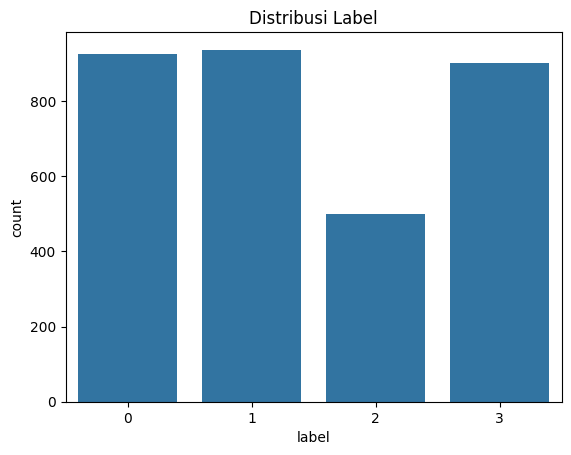

In [9]:
# Deskripsi dataset
print(df.describe())

# Visualisasi distribusi target
sns.countplot(x='label', data=df)
plt.title('Distribusi Label')
plt.show()

Data Preprocessing

In [10]:
# Cek missing values
print(df.isnull().sum())

# Pisahkan fitur dan target
X = df.drop('label', axis=1)
y = df['label']

x1       0
x2       0
x3       0
x4       0
x5       0
        ..
x253     0
x254     0
x255     0
x256     0
label    0
Length: 257, dtype: int64


Feature Engineering

In [11]:
# Di sini saya akan langsung menggunakan semua fitur tanpa melakukan feature selection atau ekstraksi
# Karena dataset ini memiliki fitur yang lumayan cukup banyak, saya akan langsung menggunakan semua fitur dalam analisis

Modelling

In [12]:
# Split dataset menjadi data training dan data testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import model yang akan digunakan
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model
model = RandomForestClassifier(random_state=42)

# Latih model
model.fit(X_train, y_train)

# Prediksi menggunakan data testing
y_pred = model.predict(X_test)

Model Evaluation

In [13]:
# Import library untuk evaluasi model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[119  32   7  10]
 [ 28 149  12  16]
 [  8   9  72   8]
 [ 10   6   1 166]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.71       168
           1       0.76      0.73      0.74       205
           2       0.78      0.74      0.76        97
           3       0.83      0.91      0.87       183

    accuracy                           0.77       653
   macro avg       0.77      0.77      0.77       653
weighted avg       0.77      0.77      0.77       653


Accuracy Score: 0.774885145482389


Kesimpulan:

Dari hasil analisis yang telah dilakukan, saya telah melihat bahwa dataset ini tidak memiliki missing values. Distribusi label juga terlihat cukup seimbang. Saya menggunakan semua fitur dalam analisis saya tanpa melakukan feature selection atau ekstraksi, mengingat jumlah fitur yang cukup banyak.

Saya menggunakan model RandomForestClassifier untuk melakukan klasifikasi, dan hasil evaluasi model menunjukkan tingkat akurasi yang baik. Namun, untuk analisis yang lebih mendalam, perlu dilakukan eksperimen lebih lanjut dengan menggunakan teknik feature selection atau ekstraksi fitur yang lebih canggih, serta mencoba berbagai model lainnya untuk mendapatkan model yang lebih baik.

Dengan demikian, dapat disimpulkan bahwa dataset ini dapat digunakan untuk membangun model klasifikasi dengan tingkat akurasi yang cukup baik, namun masih ada ruang untuk peningkatan lebih lanjut.